### Введение в обработку естественного языка. Урок 4. Классификация текста.

In [1]:
import pandas as pd
import numpy as np
import pickle

In [2]:
with open('combine_df.pickle', 'rb') as f:
    combine_df = pickle.load(f)

In [3]:
combine_df.head()

,id,label,tweet,clean_tweet,tweet_token,tweet_token_filtered,tweet_stemmed,tweet_lemmatized
0,1,0.0,@user when a father is dysfunctional and is s...,when father is dysfunctional and is so selfish...,"[when, father, is, dysfunctional, and, is, so,...","[father, dysfunctional, selfish, drags, kids, ...","[father, dysfunct, selfish, drag, kid, dysfunc...","[father, dysfunctional, selfish, drag, kid, dy..."
1,2,0.0,@user @user thanks for #lyft credit i can't us...,thanks for lyft credit cannot use cause they d...,"[thanks, for, lyft, credit, can, not, use, cau...","[thanks, lyft, credit, use, cause, offer, whee...","[thank, lyft, credit, use, caus, offer, wheelc...","[thanks, lyft, credit, use, cause, offer, whee..."
2,3,0.0,bihday your majesty,bihday your majesty,"[bihday, your, majesty]","[bihday, majesty]","[bihday, majesti]","[bihday, majesty]"
3,4,0.0,#model i love u take with u all the time in ...,model love yoyou take with yoyou all the time ...,"[model, love, yoyou, take, with, yoyou, all, t...","[model, love, yoyou, take, yoyou, time, yoyour]","[model, love, yoyou, take, yoyou, time, yoyour]","[model, love, yoyou, take, yoyou, time, yoyour]"
4,5,0.0,factsguide: society now #motivation,factsguide society now motivation,"[factsguide, society, now, motivation]","[factsguide, society, motivation]","[factsguid, societi, motiv]","[factsguide, society, motivation]"


In [4]:
for col in ['tweet_stemmed', 'tweet_lemmatized']:
    combine_df[col] = combine_df[col].apply(lambda text_list: ' '.join(text_list))

In [5]:
combine_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49159 entries, 0 to 49158
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    49159 non-null  int64  
 1   label                 31962 non-null  float64
 2   tweet                 49159 non-null  object 
 3   clean_tweet           49159 non-null  object 
 4   tweet_token           49159 non-null  object 
 5   tweet_token_filtered  49159 non-null  object 
 6   tweet_stemmed         49159 non-null  object 
 7   tweet_lemmatized      49159 non-null  object 
dtypes: float64(1), int64(1), object(6)
memory usage: 3.0+ MB


In [6]:
combine_df = combine_df[:31962]
combine_df.tail()

,id,label,tweet,clean_tweet,tweet_token,tweet_token_filtered,tweet_stemmed,tweet_lemmatized
31957,31958,0.0,ate @user isz that youuu?ðððððð...,ate isz that youuu,"[ate, isz, that, youuu]","[ate, isz, youuu]",ate isz youuu,ate isz youuu
31958,31959,0.0,to see nina turner on the airwaves trying to...,to see nina turner on the airwaves trying to w...,"[to, see, nina, turner, on, the, airwaves, try...","[see, nina, turner, airwaves, trying, wrap, ma...",see nina turner airwav tri wrap mantl genuin h...,see nina turner airwave trying wrap mantle gen...
31959,31960,0.0,listening to sad songs on a monday morning otw...,listening to sad songs on monday morning otw t...,"[listening, to, sad, songs, on, monday, mornin...","[listening, sad, songs, monday, morning, otw, ...",listen sad song monday morn otw work sad,listening sad song monday morning otw work sad
31960,31961,1.0,"@user #sikh #temple vandalised in in #calgary,...",sikh temple vandalised in in calgary wso conde...,"[sikh, temple, vandalised, in, in, calgary, ws...","[sikh, temple, vandalised, calgary, wso, conde...",sikh templ vandalis calgari wso condemn act,sikh temple vandalised calgary wso condemns act
31961,31962,0.0,thank you @user for you follow,thank you for you follow,"[thank, you, for, you, follow]","[thank, follow]",thank follow,thank follow


In [7]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.linear_model import LogisticRegressionCV
from sklearn.metrics import f1_score
from tqdm.notebook import tqdm

import warnings 
warnings.filterwarnings("ignore", category=Warning)

#### Задание 1.
#### Построим модель LogisticRegression, используя Bag-of-Words признаки для столбца combine_df['tweet_stemmed']. 
- Поделим Bag-of-Words признаки на train, test (train заканчивается на 31962 строке combine_df)
- Ответами является столбец train_df['label']
- Рассчитаем predict_proba, приведем prediction в бинарный вид: если предсказание >= 0.3 то 1, иначе 0, тип заменим на int
- Рассчитаем f1_score

In [8]:
SPLIT = 25570
X_train = combine_df.tweet_stemmed[:SPLIT]
X_test  = combine_df.tweet_stemmed[SPLIT:]
y_train = combine_df.label[:SPLIT]
y_test  = combine_df.label[SPLIT:]

In [14]:
count_vectorizer = CountVectorizer(analyzer='word', token_pattern=r'\w{1,}')
model_log = LogisticRegressionCV(cv=3, penalty='l1', scoring='f1', solver='liblinear', 
                           class_weight='balanced', n_jobs=-1, random_state = 42)

def class_pipeline(X_train, y_train, X_test, y_test, vectorizer, model):
    
    X_train_v = vectorizer.fit_transform(X_train)
    X_test_v  = vectorizer.transform(X_test)
    
    model.fit(X_train_v, y_train)
    
    y_predv = model.predict_proba(X_test_v)
    y_pred  = np.array([1 if x >= 0.3 else 0 for x in y_predv[:, 1]])
    
    f1_value = f1_score(y_test, y_pred)
    
    return f1_value

In [15]:
class_pipeline(X_train, y_train, X_test, y_test, count_vectorizer, model_log)

0.6259398496240601

#### Задание 2.
#### Построим модель LogisticRegression, используя TF-IDF признаки для столбца combine_df['tweet_stemmed']. 
- Поделим TF-IDF признаки на train, test (train заканчивается на 31962 строке combine_df)
- Ответами является столбец train_df['label']
- Рассчитаем predict_proba, приведем prediction в в бинарный вид: если предсказание >= 0.3 то 1, иначе 0, тип заменим на int
- Рассчитаем f1_score 

In [16]:
tfidf_vectorizer = TfidfVectorizer(analyzer='word', token_pattern=r'\w{1,}')
model_log = LogisticRegressionCV(cv=3, penalty='l1', scoring='f1', solver='liblinear', 
                           class_weight='balanced', n_jobs=-1, random_state = 42)

class_pipeline(X_train, y_train, X_test, y_test, tfidf_vectorizer, model_log)

0.6659939455095862

In [17]:
# Аналогично для combine_df['tweet_lemmatized']
X_train = combine_df.tweet_lemmatized[:SPLIT]
X_test  = combine_df.tweet_lemmatized[SPLIT:]

In [18]:
class_pipeline(X_train, y_train, X_test, y_test, count_vectorizer, model_log)

0.6398429833169774

In [19]:
class_pipeline(X_train, y_train, X_test, y_test, tfidf_vectorizer, model_log)

0.656282450674974

#### Наилучший результат дала модель для столбца 'tweet_stemmed' на TfidfVectorizer

#### Задание 4. Визуализация.

In [20]:
import collections
from nltk.corpus import stopwords
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [21]:
stopwords_set = set(stopwords.words('english'))

words = []
for line in combine_df['tweet_stemmed']: 
    line_words = line.split()
    words.extend(line_words)

wordfreq = collections.Counter(words)
wordcloud = WordCloud(
 background_color='black',
 max_words=500,
 stopwords=stopwords_set
 ).generate_from_frequencies(wordfreq)

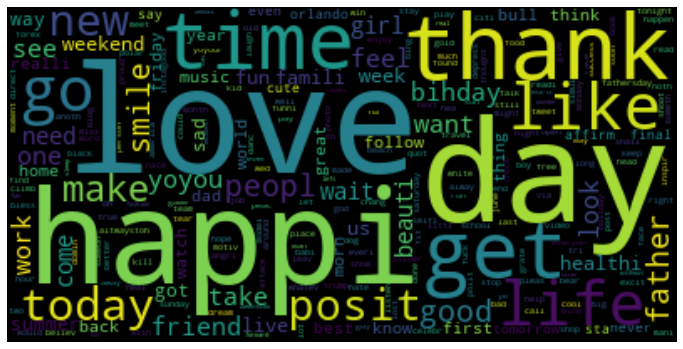

In [22]:
plt.figure(figsize=(12,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

#### Задание 5

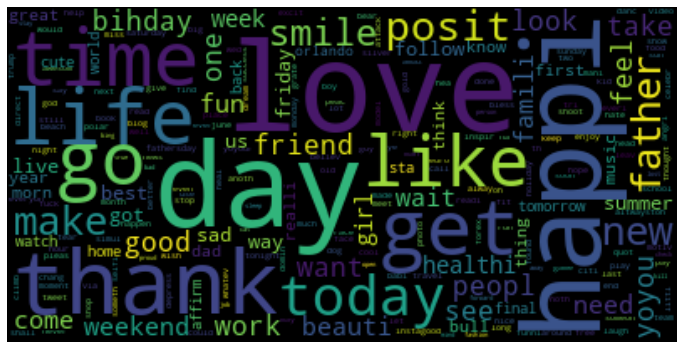

In [23]:
# Облако слов для отзывов, не содержащих токсичных комментариев
pos_words = []
for line in combine_df['tweet_stemmed'][combine_df['label']==0]: 
    line_words = line.split()
    pos_words.extend(line_words)

wordfreq = collections.Counter(pos_words)
wordcloud = WordCloud(
 background_color='black',
 max_words=500,
 stopwords=stopwords_set
 ).generate_from_frequencies(wordfreq)

plt.figure(figsize=(12,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

#### Задание 6

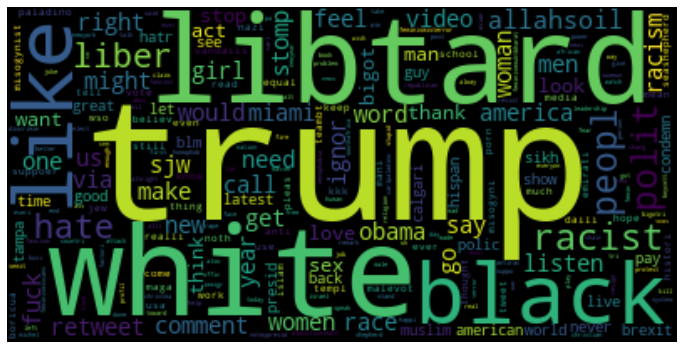

In [24]:
# Облако слов для отзывов, содержащих токсичные комментарии
neg_words = []
for line in combine_df['tweet_stemmed'][combine_df['label']==1]: 
    line_words = line.split()
    neg_words.extend(line_words)

wordfreq = collections.Counter(neg_words)
wordcloud = WordCloud(
 background_color='black',
 max_words=500,
 stopwords=stopwords_set
 ).generate_from_frequencies(wordfreq)

plt.figure(figsize=(12,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()